In [2]:
import pandas as pd 
df=pd.read_csv('./train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [4]:
#removing null data from dataset
df=df.dropna()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 18285 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   author  18285 non-null  object
 3   text    18285 non-null  object
 4   label   18285 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 857.1+ KB


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
df.columns
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df=df.drop(['author','text'],axis=1)

In [7]:
df.head(10)

,id,title,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",0
10,10,Obama’s Organizing for Action Partners with So...,0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",0


In [8]:
df=df.reset_index(drop=True)
df.head(10)

,id,title,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,2,Why the Truth Might Get You Fired,1
3,3,15 Civilians Killed In Single US Airstrike Hav...,1
4,4,Iranian woman jailed for fictional unpublished...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,0
6,7,Benoît Hamon Wins French Socialist Party’s Pre...,0
7,9,"A Back-Channel Plan for Ukraine and Russia, Co...",0
8,10,Obama’s Organizing for Action Partners with So...,0
9,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18285 entries, 0 to 18284
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      18285 non-null  int64 
 1   title   18285 non-null  object
 2   label   18285 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


In [10]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer#-->stemming
import nltk
nltk.download('stopwords')

import nltk
nltk.download('punkt')
#from nltk.stem.WordNetLemmatizer -->lematizatiom

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
ps=PorterStemmer()

In [12]:
ps.stem("hi this is chandu")

'hi this is chandu'

In [13]:
def stemming (content):
    con=re.sub('[^a-zA-Z]',' ',content)
    con=con.lower()
    con=con.split()
    con=[ps.stem(word) for word in con if not word in set(stopwords.words('english'))]
    con=' '.join(con)
    return con
    

In [14]:
stemming('hi hello this is me chndu hi is jh')

'hi hello chndu hi jh'

In [15]:
df['title']=df['title'].apply(stemming)

In [16]:
x=df['title']

In [17]:
y=df['label']

In [18]:
y.shape

(18285,)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=0.20)

In [21]:

from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
vect=TfidfVectorizer()

In [23]:

x_train=vect.fit_transform(x_train)
x_test=vect.transform(x_test)

In [24]:
x_test.shape

(3657, 12602)

In [25]:
#USING DECISION TREE
from sklearn.tree import DecisionTreeClassifier

In [26]:
model1=DecisionTreeClassifier()

In [27]:
model1.fit(x_train, y_train)

DecisionTreeClassifier()

In [28]:
prediction1=model1.predict(x_test)

In [29]:
prediction1

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [30]:
model1.score(x_test,y_test)

0.9059338255400602

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

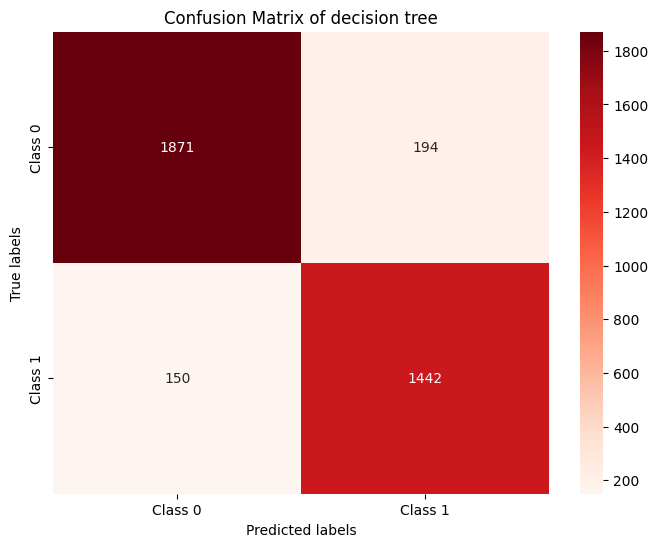

In [32]:
conf_matrix = confusion_matrix(y_test, prediction1)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of decision tree')
plt.show()


In [33]:
#USING RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

In [34]:
model2=RandomForestClassifier()

In [35]:
model2.fit(x_train, y_train)

RandomForestClassifier()

In [36]:
prediction2=model2.predict(x_test)

In [37]:
prediction2

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [38]:
model2.score(x_test,y_test)

0.933552091878589

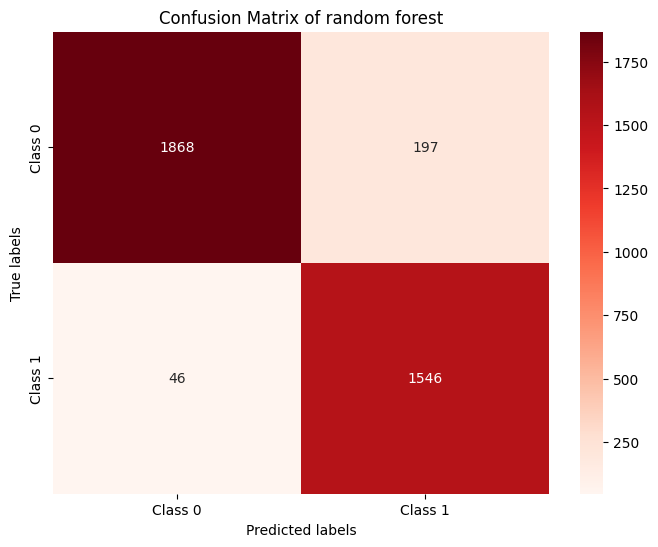

In [39]:
conf_matrix = confusion_matrix(y_test, prediction2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of random forest')
plt.show()

In [40]:
# Using NAIVE BAYES
#1.Gaussian Naive Bayes
#2.Bernoulli Naive Bayes
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB


In [41]:
#1.Gaussian Naive Bayes
model3=GaussianNB()

In [42]:
x_train_dense = x_train.toarray()
model3.fit(x_train_dense, y_train)

GaussianNB()

In [43]:
x_test_dense=x_test.toarray()
prediction3=model3.predict(x_test_dense)

In [44]:
prediction3

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [45]:
model3.score(x_test_dense,y_test)

0.6272901285206454

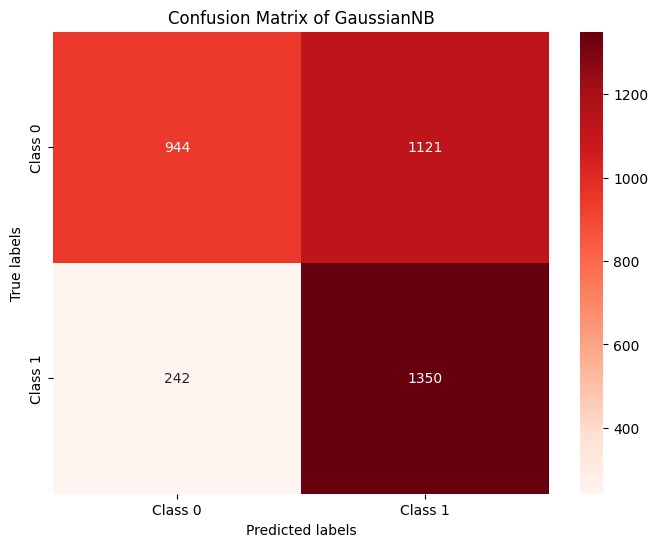

In [46]:
conf_matrix = confusion_matrix(y_test, prediction3)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of GaussianNB')
plt.show()

In [47]:
model4=BernoulliNB()

In [48]:
x_train_dense = x_train.toarray()
model4.fit(x_train_dense, y_train)

BernoulliNB()

In [49]:
x_test_dense=x_test.toarray()
prediction4=model4.predict(x_test_dense)

In [50]:
prediction4

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [51]:
model4.score(x_test_dense,y_test)

0.9176920973475526

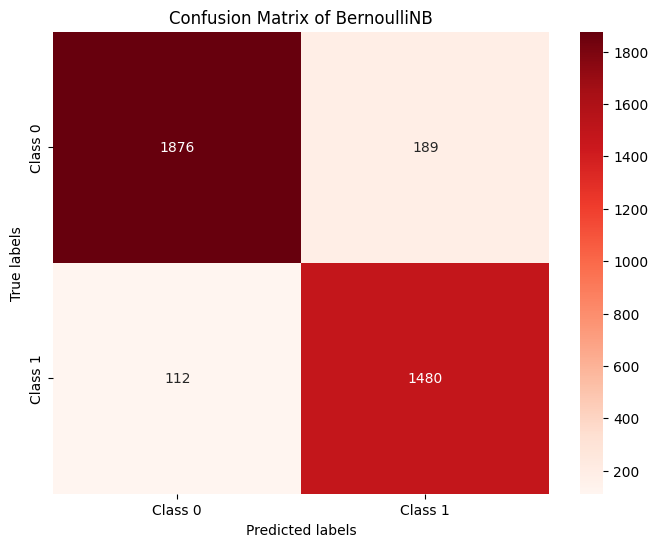

In [52]:
conf_matrix = confusion_matrix(y_test, prediction4)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of BernoulliNB')
plt.show()

In [53]:
from sklearn.svm import SVC

In [54]:
model5=SVC(kernel='linear')

In [55]:
model5.fit(x_train, y_train)

SVC(kernel='linear')

In [56]:
prediction5=model5.predict(x_test)

In [57]:
prediction5

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [58]:
model5.score(x_test,y_test)

0.9286300246103364

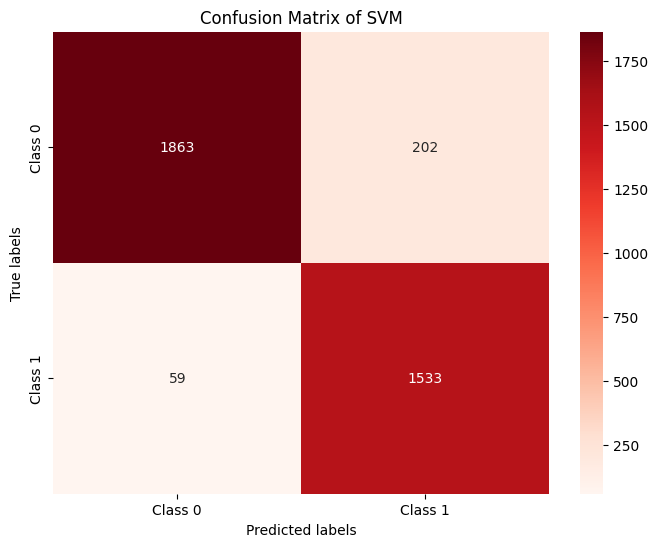

In [59]:
conf_matrix = confusion_matrix(y_test, prediction5)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of SVM')
plt.show()

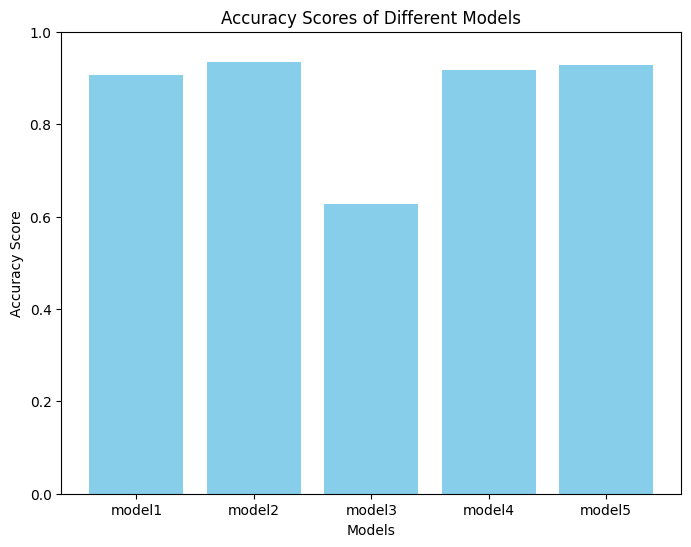

In [60]:
model_names = ['model1', 'model2', 'model3','model4','model5']
scores = [model1.score(x_test,y_test),model2.score(x_test,y_test),model3.score(x_test_dense,y_test),model4.score(x_test_dense,y_test),model5.score(x_test,y_test)]  # Replace with actual scores

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(model_names, scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy score
plt.show()